In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import dfols
import signal
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy import interpolate, integrate
from scipy.optimize import curve_fit
from stopit import threading_timeoutable as timeoutable
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from batfuns import *
plt.rcParams = set_rc_params(plt.rcParams)
import winsound

eSOH_DIR = "../data/esoh_R/"
oCV_DIR = "../data/ocv/"
hppc_DIR = "../data/hppc/"
cyc_DIR = "../data/cycling/"
fig_DIR = "../figures/figures_fit/"
res_DIR = "../data/results_fit/"
# %matplotlib widget

# Irreversible Expansion Plots

In [2]:
def fitfunc(X, b1, b2, b3, b4):
  del_sei,del_li,del_in_n,del_in_p=X
  out = 1e6*(b1*del_sei+b2*del_li+b3*del_in_n)
  out = 1e6*(b1*del_sei+b2*del_li)
  return out

In [3]:
b1 = 737.578
b2 = 1004.319
b3 = 0
b4 = 0

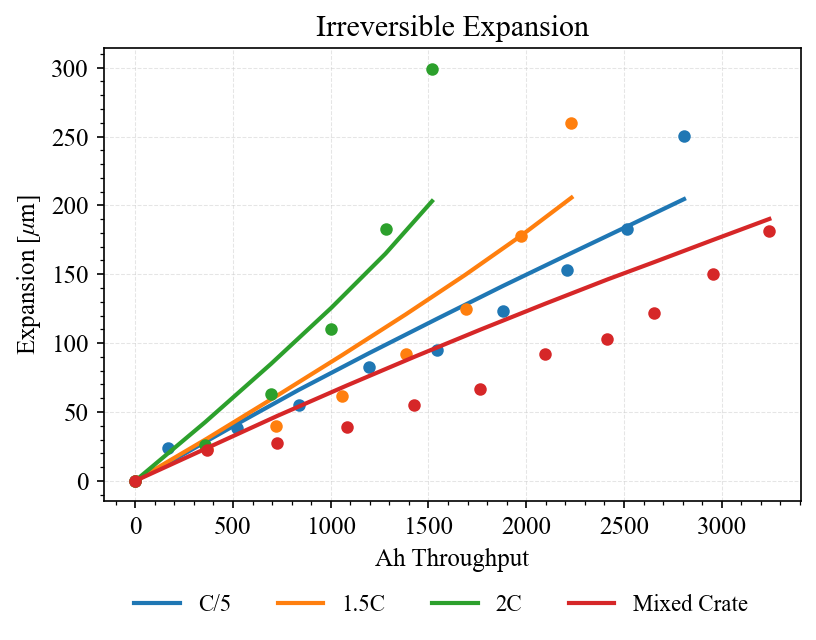

In [4]:
cells = [1,4,7,10]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    df = pd.read_csv(res_DIR + "irrev_exp_cell"+cell_no+".csv")
    irrev_exp_fit = [fitfunc((df["del_sei"][j],df["del_li"][j],df["del_in_n"][j],df["del_in_p"][j]), b1, b2, b3, b4) for j in range(len(df["N"]))]
    ax.plot(dfe["Ah_th"],df["irrev_exp"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(dfe["Ah_th"],irrev_exp_fit,color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r"Expansion [$\mu$m]")
ax.set_title(r'Irreversible Expansion')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5','1.5C','2C','Mixed Crate'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_expansion_s1_1.png')

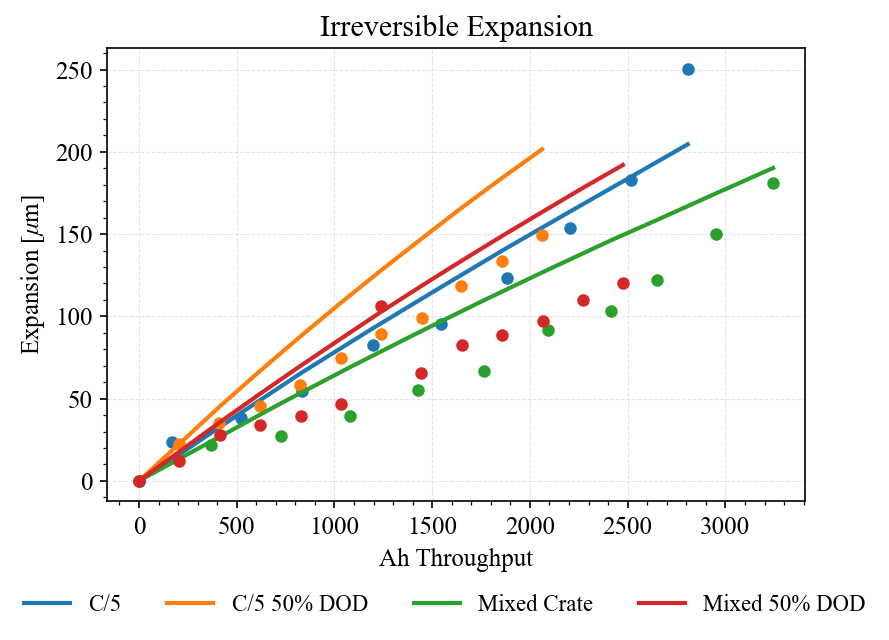

In [13]:
cells = [1,13,10,16]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    df = pd.read_csv(res_DIR + "irrev_exp_cell"+cell_no+".csv")
    irrev_exp_fit = [fitfunc((df["del_sei"][j],df["del_li"][j],df["del_in_n"][j],df["del_in_p"][j]), b1, b2, b3, b4) for j in range(len(df["N"]))]
    ax.plot(dfe["Ah_th"],df["irrev_exp"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(dfe["Ah_th"],irrev_exp_fit,color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r"Expansion [$\mu$m]")
ax.set_title(r'Irreversible Expansion')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5','C/5 50% DOD','Mixed Crate','Mixed 50% DOD'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_expansion_s1_2.png')

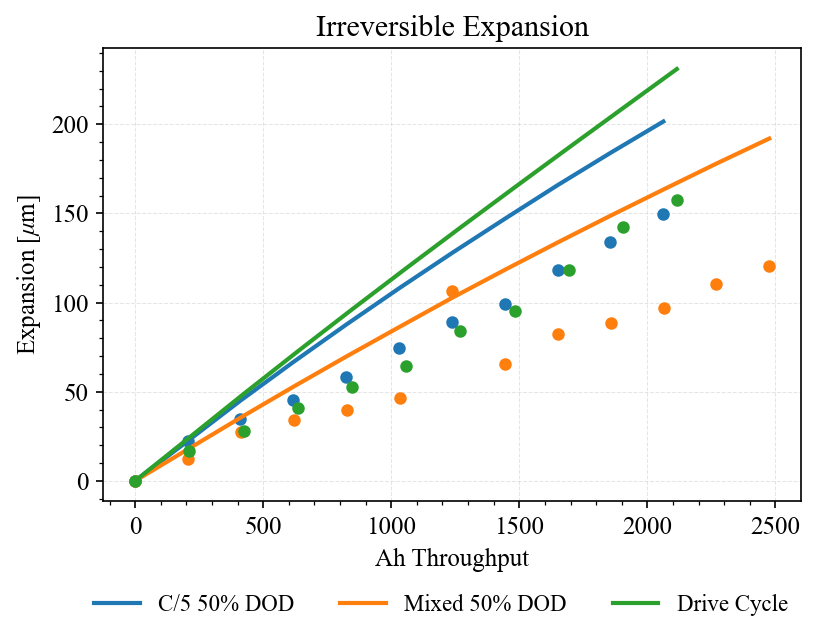

In [6]:
cells = [13,16,19]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    df = pd.read_csv(res_DIR + "irrev_exp_cell"+cell_no+".csv")
    irrev_exp_fit = [fitfunc((df["del_sei"][j],df["del_li"][j],df["del_in_n"][j],df["del_in_p"][j]), b1, b2, b3, b4) for j in range(len(df["N"]))]
    ax.plot(dfe["Ah_th"],df["irrev_exp"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(dfe["Ah_th"],irrev_exp_fit,color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r"Expansion [$\mu$m]")
ax.set_title(r'Irreversible Expansion')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5 50% DOD','Mixed 50% DOD','Drive Cycle'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_expansion_s2_2.png')

# Resistance Plots

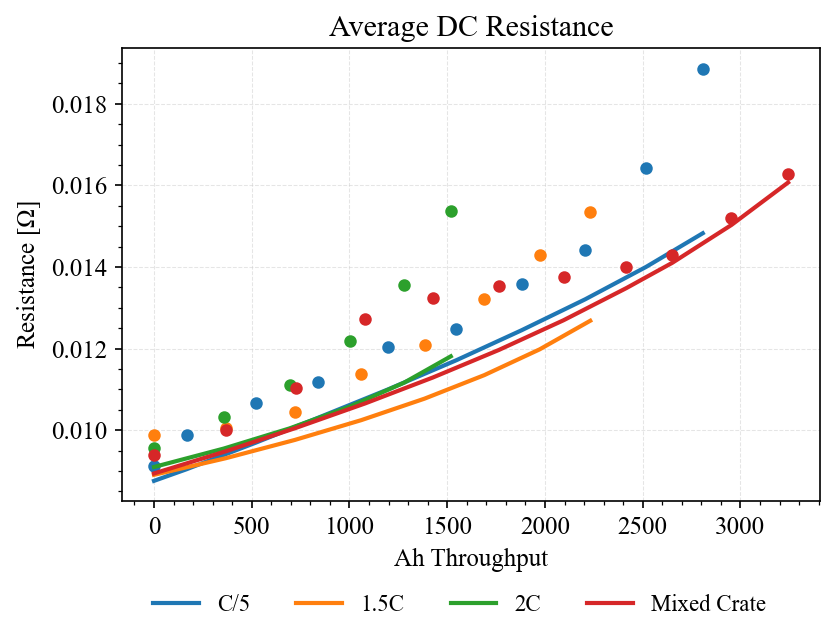

In [7]:
cells = [1,4,7,10]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no = f'{cell:02d}'
    df = pd.read_csv(res_DIR + "DC_resistance_cell_"+cell_no+".csv")
    ax.plot(df["Ah_th"],df["Rs_data"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(df["Ah_th"],df["Rs_sim"],color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r'Resistance [$\Omega$]')
ax.set_title(r'Average DC Resistance')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_resistance_s1_1.png')

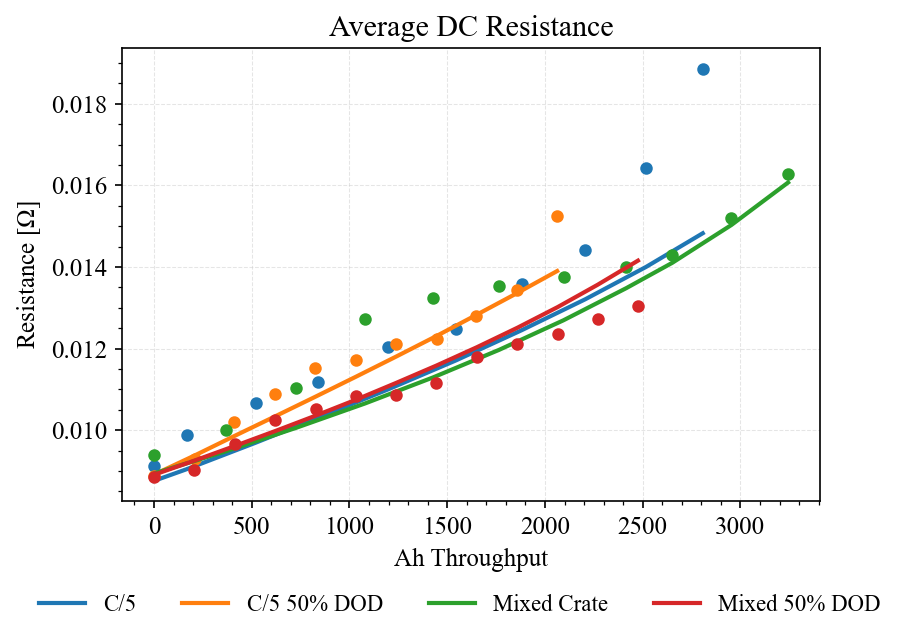

In [8]:
cells = [1,13,10,16]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no = f'{cell:02d}'
    df = pd.read_csv(res_DIR + "DC_resistance_cell_"+cell_no+".csv")
    ax.plot(df["Ah_th"],df["Rs_data"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(df["Ah_th"],df["Rs_sim"],color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r'Resistance [$\Omega$]')
ax.set_title(r'Average DC Resistance')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5','C/5 50% DOD','Mixed Crate','Mixed 50% DOD'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_resistance_s1_2.png')

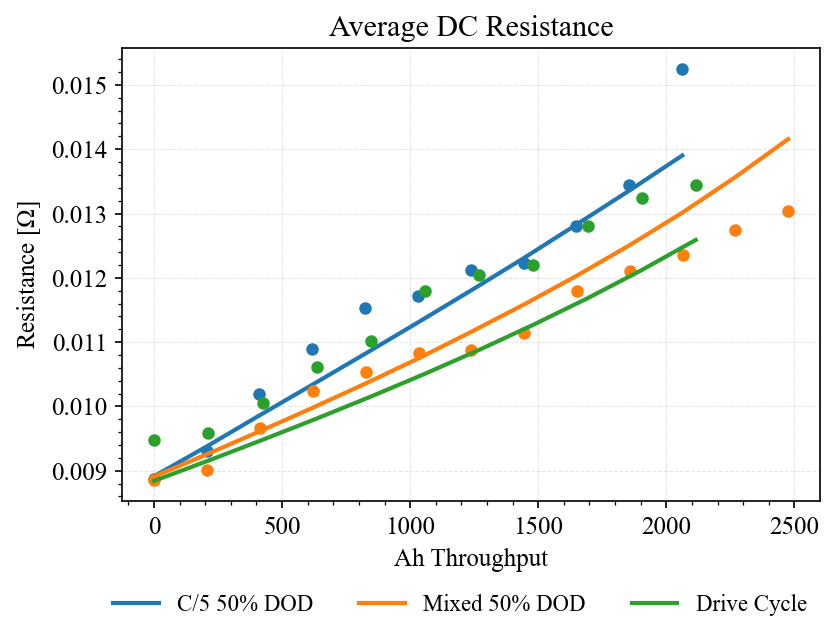

In [9]:
cells = [13,16,19]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no = f'{cell:02d}'
    df = pd.read_csv(res_DIR + "DC_resistance_cell_"+cell_no+".csv")
    ax.plot(df["Ah_th"],df["Rs_data"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(df["Ah_th"],df["Rs_sim"],color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r'Resistance [$\Omega$]')
ax.set_title(r'Average DC Resistance')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5 50% DOD','Mixed 50% DOD','Drive Cycle'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_resistance_s2_2.png')

# Capacity Plots

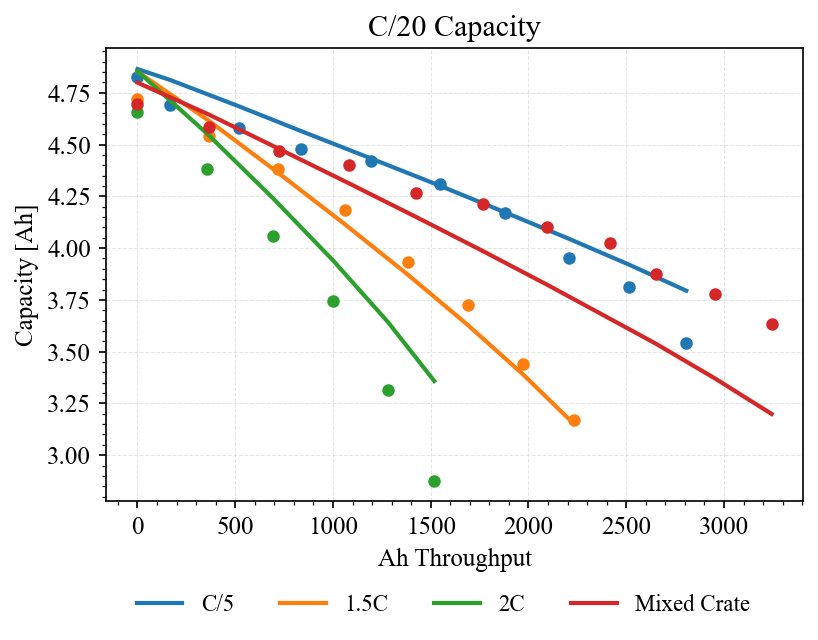

In [10]:
cells = [1,4,7,10]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    df = pd.read_csv(res_DIR + "aging_sim_eSOH_cell_"+cell_no+".csv")
    ax.plot(dfe["Ah_th"],dfe["Cap"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(dfe["Ah_th"],df["C"],color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r"Capacity [Ah]")
ax.set_title(r'C/20 Capacity')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5','1.5C','2C','Mixed Crate'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_cap_s1_1.png')

01
13
10
16


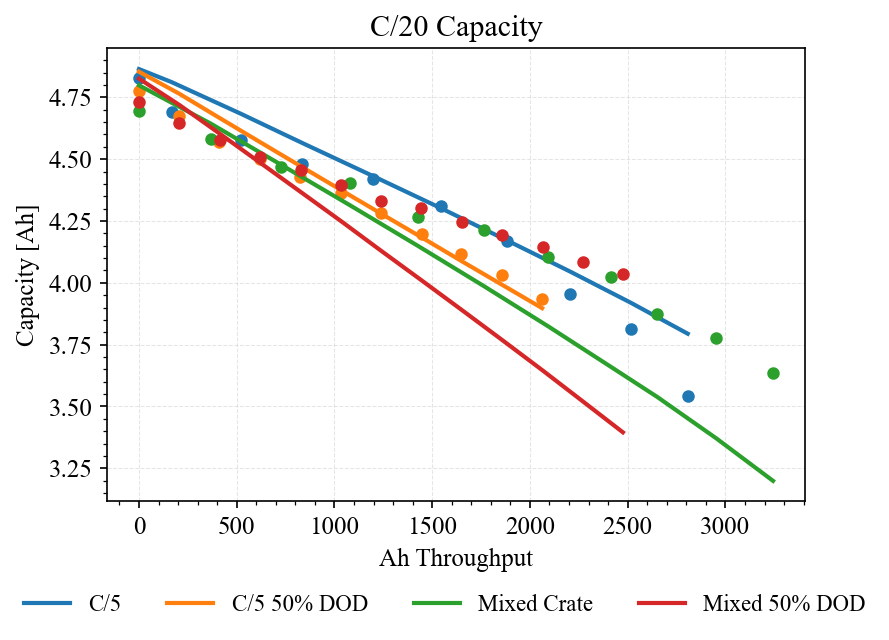

In [11]:
cells = [1,13,10,16]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    print(cell_no)
    df = pd.read_csv(res_DIR + "aging_sim_eSOH_cell_"+cell_no+".csv")
    ax.plot(dfe["Ah_th"],dfe["Cap"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(dfe["Ah_th"],df["C"],color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r"Capacity [Ah]")
ax.set_title(r'C/20 Capacity')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5','C/5 50% DOD','Mixed Crate','Mixed 50% DOD'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_cap_s1_2.png')

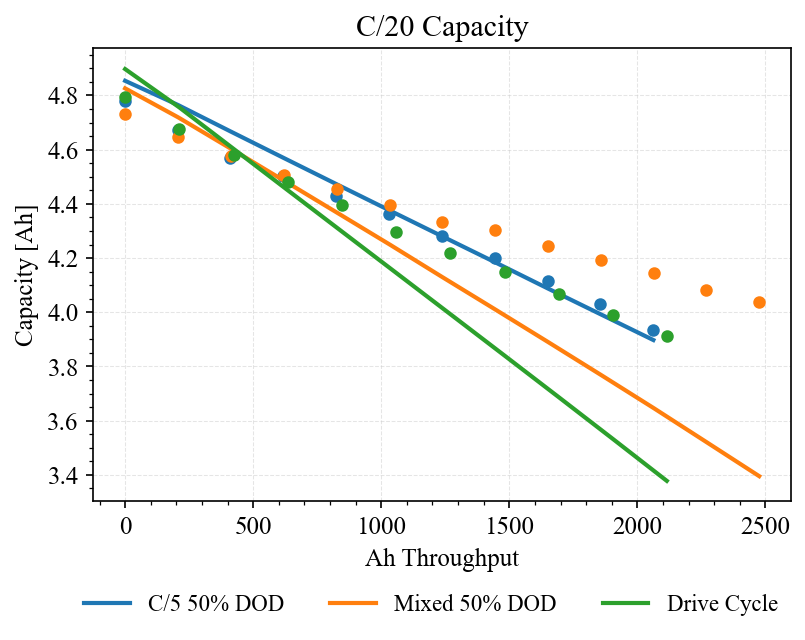

In [12]:
cells = [13,16,19]
fig, ax = plt.subplots(1,1,figsize=(6,4))
i = 0
markers = ["o","v","^","1","*","d","p"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:cyan"]
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    df = pd.read_csv(res_DIR + "aging_sim_eSOH_cell_"+cell_no+".csv")
    ax.plot(dfe["Ah_th"],dfe["Cap"],linestyle="None",marker="o",label='_nolegend_',color=colors[i])
    ax.plot(dfe["Ah_th"],df["C"],color=colors[i])
    i+=1
ax.set_xlabel('Ah Throughput')
ax.set_ylabel(r"Capacity [Ah]")
ax.set_title(r'C/20 Capacity')
# ax.legend(['C/5','1.5C','2C','Mixed Crate','C/5 50% DOD','Mixed 50% DOD','Drive Cycle'])
fig.legend(['C/5 50% DOD','Mixed 50% DOD','Drive Cycle'], 
            loc="lower center",bbox_to_anchor=[0.5,-0.10], ncol=4, fontsize=11)
plt.savefig(fig_DIR +'cycling_aging_room_cap_s2_2.png')